In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd

In [3]:
train = pd.read_csv('data/fashion-mnist_train.csv')



In [12]:
train.info()
train.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


label     2
pixel1    0
pixel2    0
pixel3    0
pixel4    0
pixel5    0
pixel6    0
pixel7    0
pixel8    0
pixel9    0
Name: 0, dtype: int64

In [17]:
print(train.columns)
train.describe()

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.247967      0.411467      0.805767      2.198283      5.682000   
std        4.306912      5.836188      8.215169     14.093378     23.819481   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      227.000000    230.000000    224.000000    255.000000    254.000000   

          ...           pixel775      pixel776      pixel777      pixel778  \
count     ...       60000.000000  60000.000000  60000.000000  60000.000000   
mean      ...          34.625400     23.300683     16.588267     17.869433   
std       ...          57.545242     48.854427     41.979611     43.966032   
min       ...           0.000000      0.000000      0.000000      0.000000   
25%       ...           0.000000      0.000000      0.000000      0.000000   
50%       ...           0.000000      0.000000      0.000000      0.000000   
75%       ...          58.000000      9.000000      0.000000      0.000000   
max       ...         255.000000    255.000000    255.000000    255.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean      22.814817     17.911483      8.520633      2.753300      0.855517   
std       51.830477     45.149388     29.614859     17.397652      9.356960   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

          pixel784  
count  60000.00000  
mean       0.07025  
std        2.12587  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        0.00000  
max      170.00000  

[8 rows x 785 columns]

In [20]:
train.iloc[0:10]['label']

0    2
1    9
2    6
3    0
4    3
5    4
6    4
7    5
8    4
9    8
Name: label, dtype: int64

In [40]:
#Instantiate model
pca_model = PCA()
#Train model
inputs = train.iloc[:,1:]
pca_model.fit(inputs)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [41]:
cumsum = np.cumsum(pca_model.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [42]:
print("nombre de dimensions initiales", train.shape[1])
print("nombre de dimensions expliquant 95% de la variance :", d)

nombre de dimensions initiales 785
nombre de dimensions expliquant 95% de la variance : 187


In [43]:
# Compression
pca_reduced = PCA(n_components=d)
X_reduced = pca_reduced.fit_transform(inputs)
X_recovered = pca_reduced.inverse_transform(X_reduced)

In [44]:
X_recovered.shape

(60000, 784)

In [54]:
X_rec_reshaped=X_recovered.reshape((60000,28,28))

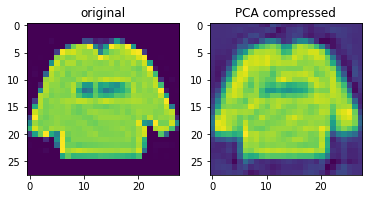

In [55]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("original")
plt.imshow(inputs.loc[0].values.reshape((28,28)))
f.add_subplot(1,2, 2)

plt.title("PCA compressed")
plt.imshow(X_rec_reshaped[0])
plt.show(block=True)

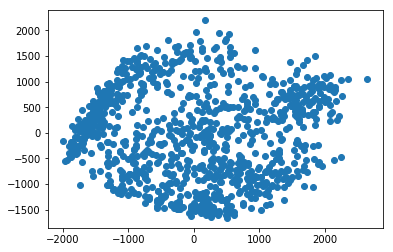

In [114]:
# Plot des 2 composantes principales
X_reduced_2d = X_reduced[:,:2]
labels = train.iloc[:,0]
nmax = 1000
Xi = X_reduced_2d[:nmax,0]
Yi = X_reduced_2d[:nmax,1]

plt.scatter(Xi,Yi)

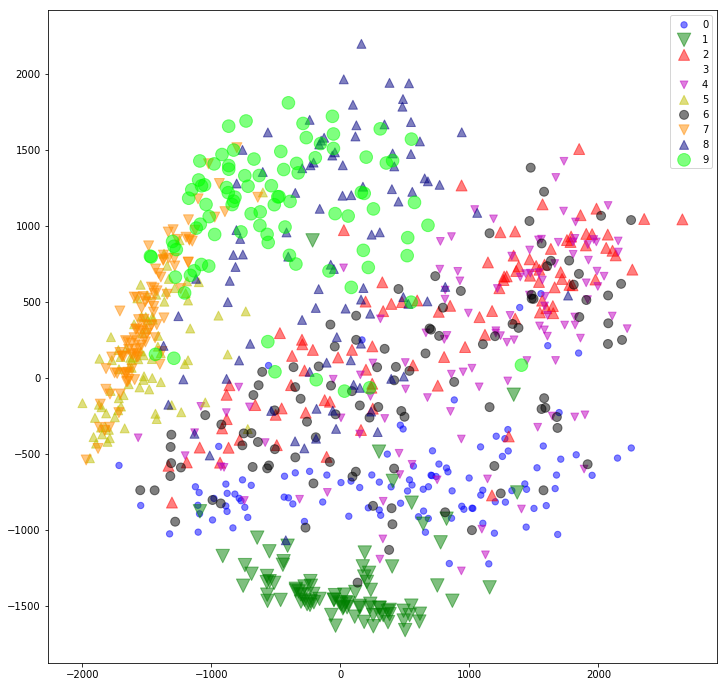

In [115]:
import matplotlib.cm as cm
plt.figure(figsize=(12,12))
unique = set(train.label)
marker_lst = ["o","v","^"]
mycolors = ['b','g','r','c','m','y','k','darkorange','navy','lime']
for i,u in enumerate(unique):
    
    Xi_select = [Xi[j] for j in range(len(Xi)) if labels.iloc[j] == u]
    Yi_select = [Yi[j] for j in range(len(Yi)) if labels.iloc[j] == u]

#    labl = [first_penetration[j,'label'] \
#                  for j in range(len(X_embedded)) if first_penetration.loc[j,'label'] == u]
    #color = [labels.iloc[j]*20 \
     #             for j in range(len(Xi)) if labels.iloc[j] == u]
    color = [mycolors[labels.iloc[j]] for j in range(len(Xi)) if labels.iloc[j] == u]
    size = [labels.iloc[i]*20\
                  for j in range(len(Xi)) if labels.iloc[j] == u]

    #plt.scatter(Xi_select, Yi_select, c=color, label=str(u),s=size,alpha=0.5, marker=marker_lst[u%len(marker_lst)])
    plt.scatter(Xi_select, Yi_select, c=color, label=str(u),s=size,alpha=0.5, \
            marker=marker_lst[u%len(marker_lst)])
plt.legend()

